# The impact of streetlights on traffic accidents

In [34]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


## Introduction
Car accidents are, unfortunately, a common feature of American cities. While most car accidents happen during the day, a substantial number do happen at night, when visibility is reduced. City planners are tasked with determining where to play street lights. Understanding how street lights impact car accidents may affect those decisions. 

Therefore, we seek to answer the following questions:
How might the presence of street lights affect the number of car accidents in a city? 
What is the impact when a street light is present but not on? 
Further, how might we predict where accidents are likely to happen at night based on the presence of a street light that is turned on? 

## Data
We will use the Collisions-All Years Data Set from the Seattle Department of Transportation (SDOT) Traffic Management Division to answer these questions.

## Methodology
In this section, we will review the exploratory data analysis, inferential statistical testing, and machine learning we used to answer our questions.

In [3]:
#We loaded the data and explored it.
df = pd.read_csv("C:/Users/kylec/Downloads/Data-Collisions (1).csv")

df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
#We explored the variable LIGHTCOND, in particular, to understand the various conditions of lighting.
df.LIGHTCOND.unique()

array(['Daylight', 'Dark - Street Lights On', 'Dark - No Street Lights',
       nan, 'Unknown', 'Dusk', 'Dawn', 'Dark - Street Lights Off',
       'Other', 'Dark - Unknown Lighting'], dtype=object)

In [13]:
#We explored how many accidents take place in different lighting conditions.
df_light = df[['LIGHTCOND','OBJECTID']]
df_lightgrp = df_light.groupby(['LIGHTCOND'], as_index=False).count()
df_lightgrp

,LIGHTCOND,OBJECTID
0,Dark - No Street Lights,1537
1,Dark - Street Lights Off,1199
2,Dark - Street Lights On,48507
3,Dark - Unknown Lighting,11
4,Dawn,2502
5,Daylight,116137
6,Dusk,5902
7,Other,235
8,Unknown,13473


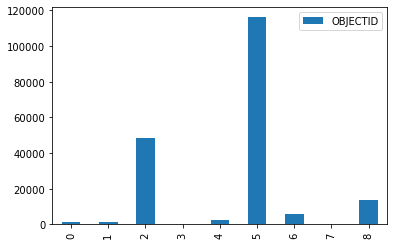

In [19]:
#We visualized the data and can see that the greatest number of accidents happen during daylight. The second highest number happen in the dark when street lights are on. 
#Conditions where street lights are off or there are no street lights seem relatively similar.
df_lightgrp.plot(kind='bar')

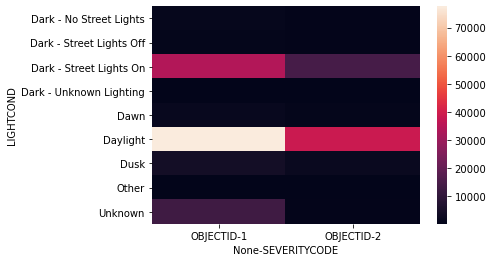

In [36]:
#We can see by basic correlation that the majority of collisions happen at daylight or in the dark with streelights on. 
#This suggests that light is correlated with collisions. 
#We suspect that is not the case; rather, most people happen to be driving when light conditions are good, which means more people may also be in a collision when light conditions are good.

#We then looked at what kind of accidents happen in different lighting conditions.

df_light2 = df[['LIGHTCOND','OBJECTID','SEVERITYCODE']]
df_light2grp = df_light2.groupby(['LIGHTCOND','SEVERITYCODE'], as_index=False).count()
df_light2grp_pivot = df_light2grp.pivot(index='LIGHTCOND',columns='SEVERITYCODE')

#We can also visualize this pivot table.
sns.heatmap(df_light2grp_pivot)

In [41]:
#Then we dropped the day conditions.
df_darkgrp_pivot = df_light2grp_pivot.drop(['Dawn','Daylight','Dusk','Other','Unknown'])
df_darkgrp_pivot

OBJECTID       
SEVERITYCODE                    1      2
LIGHTCOND                               
Dark - No Street Lights      1203    334
Dark - Street Lights Off      883    316
Dark - Street Lights On     34032  14475
Dark - Unknown Lighting         7      4

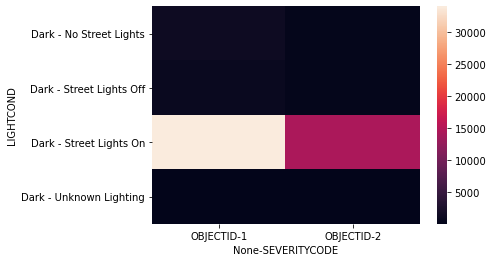

In [42]:
#Visualize again with only Dark conditions, which still doesn't tell us much other than the vast majority of accidents of both types happen when street lights are on.
sns.heatmap(df_darkgrp_pivot)

In [43]:
#What if we remove street lights on?
df_darkgrp2_pivot = df_darkgrp_pivot .drop(['Dark - Street Lights On'])
df_darkgrp2_pivot

OBJECTID     
SEVERITYCODE                    1    2
LIGHTCOND                             
Dark - No Street Lights      1203  334
Dark - Street Lights Off      883  316
Dark - Unknown Lighting         7    4

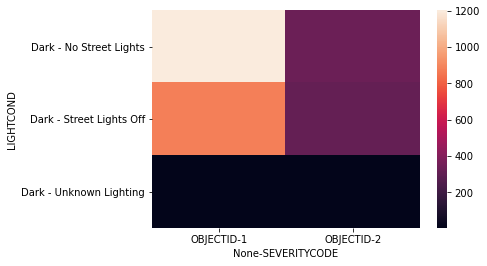

In [44]:
#This is sort of interesting. We can see that most collisions in this case happen when there are no street lights.
#Most of those cases are Code 1 - Property Damage.
sns.heatmap(df_darkgrp2_pivot)